# Random Forest Implementation
In this notebook, we implement the random forest classifier on the extracted features.

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, roc_curve, auc
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

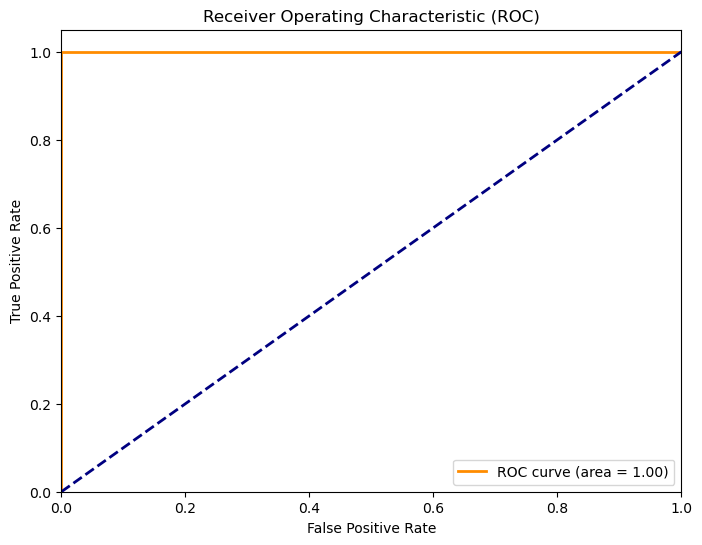

Accuracy: 1.00
Precision: 1.00
AUC: 1.00


In [10]:
feature_df = pd.read_csv('combined_feature_vectors.csv')

# Assuming feature_df is your DataFrame with the last column 'Label' being the target
X = feature_df.drop('Label', axis=1)
y = feature_df['Label']

# Split the dataset into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier
rf_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_classifier.predict(X_test)

# Calculate the probability scores of the test set
y_probs = rf_classifier.predict_proba(X_test)[:, 1]

# Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

# Plotting ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

# Print the metrics
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"AUC: {roc_auc:.2f}")

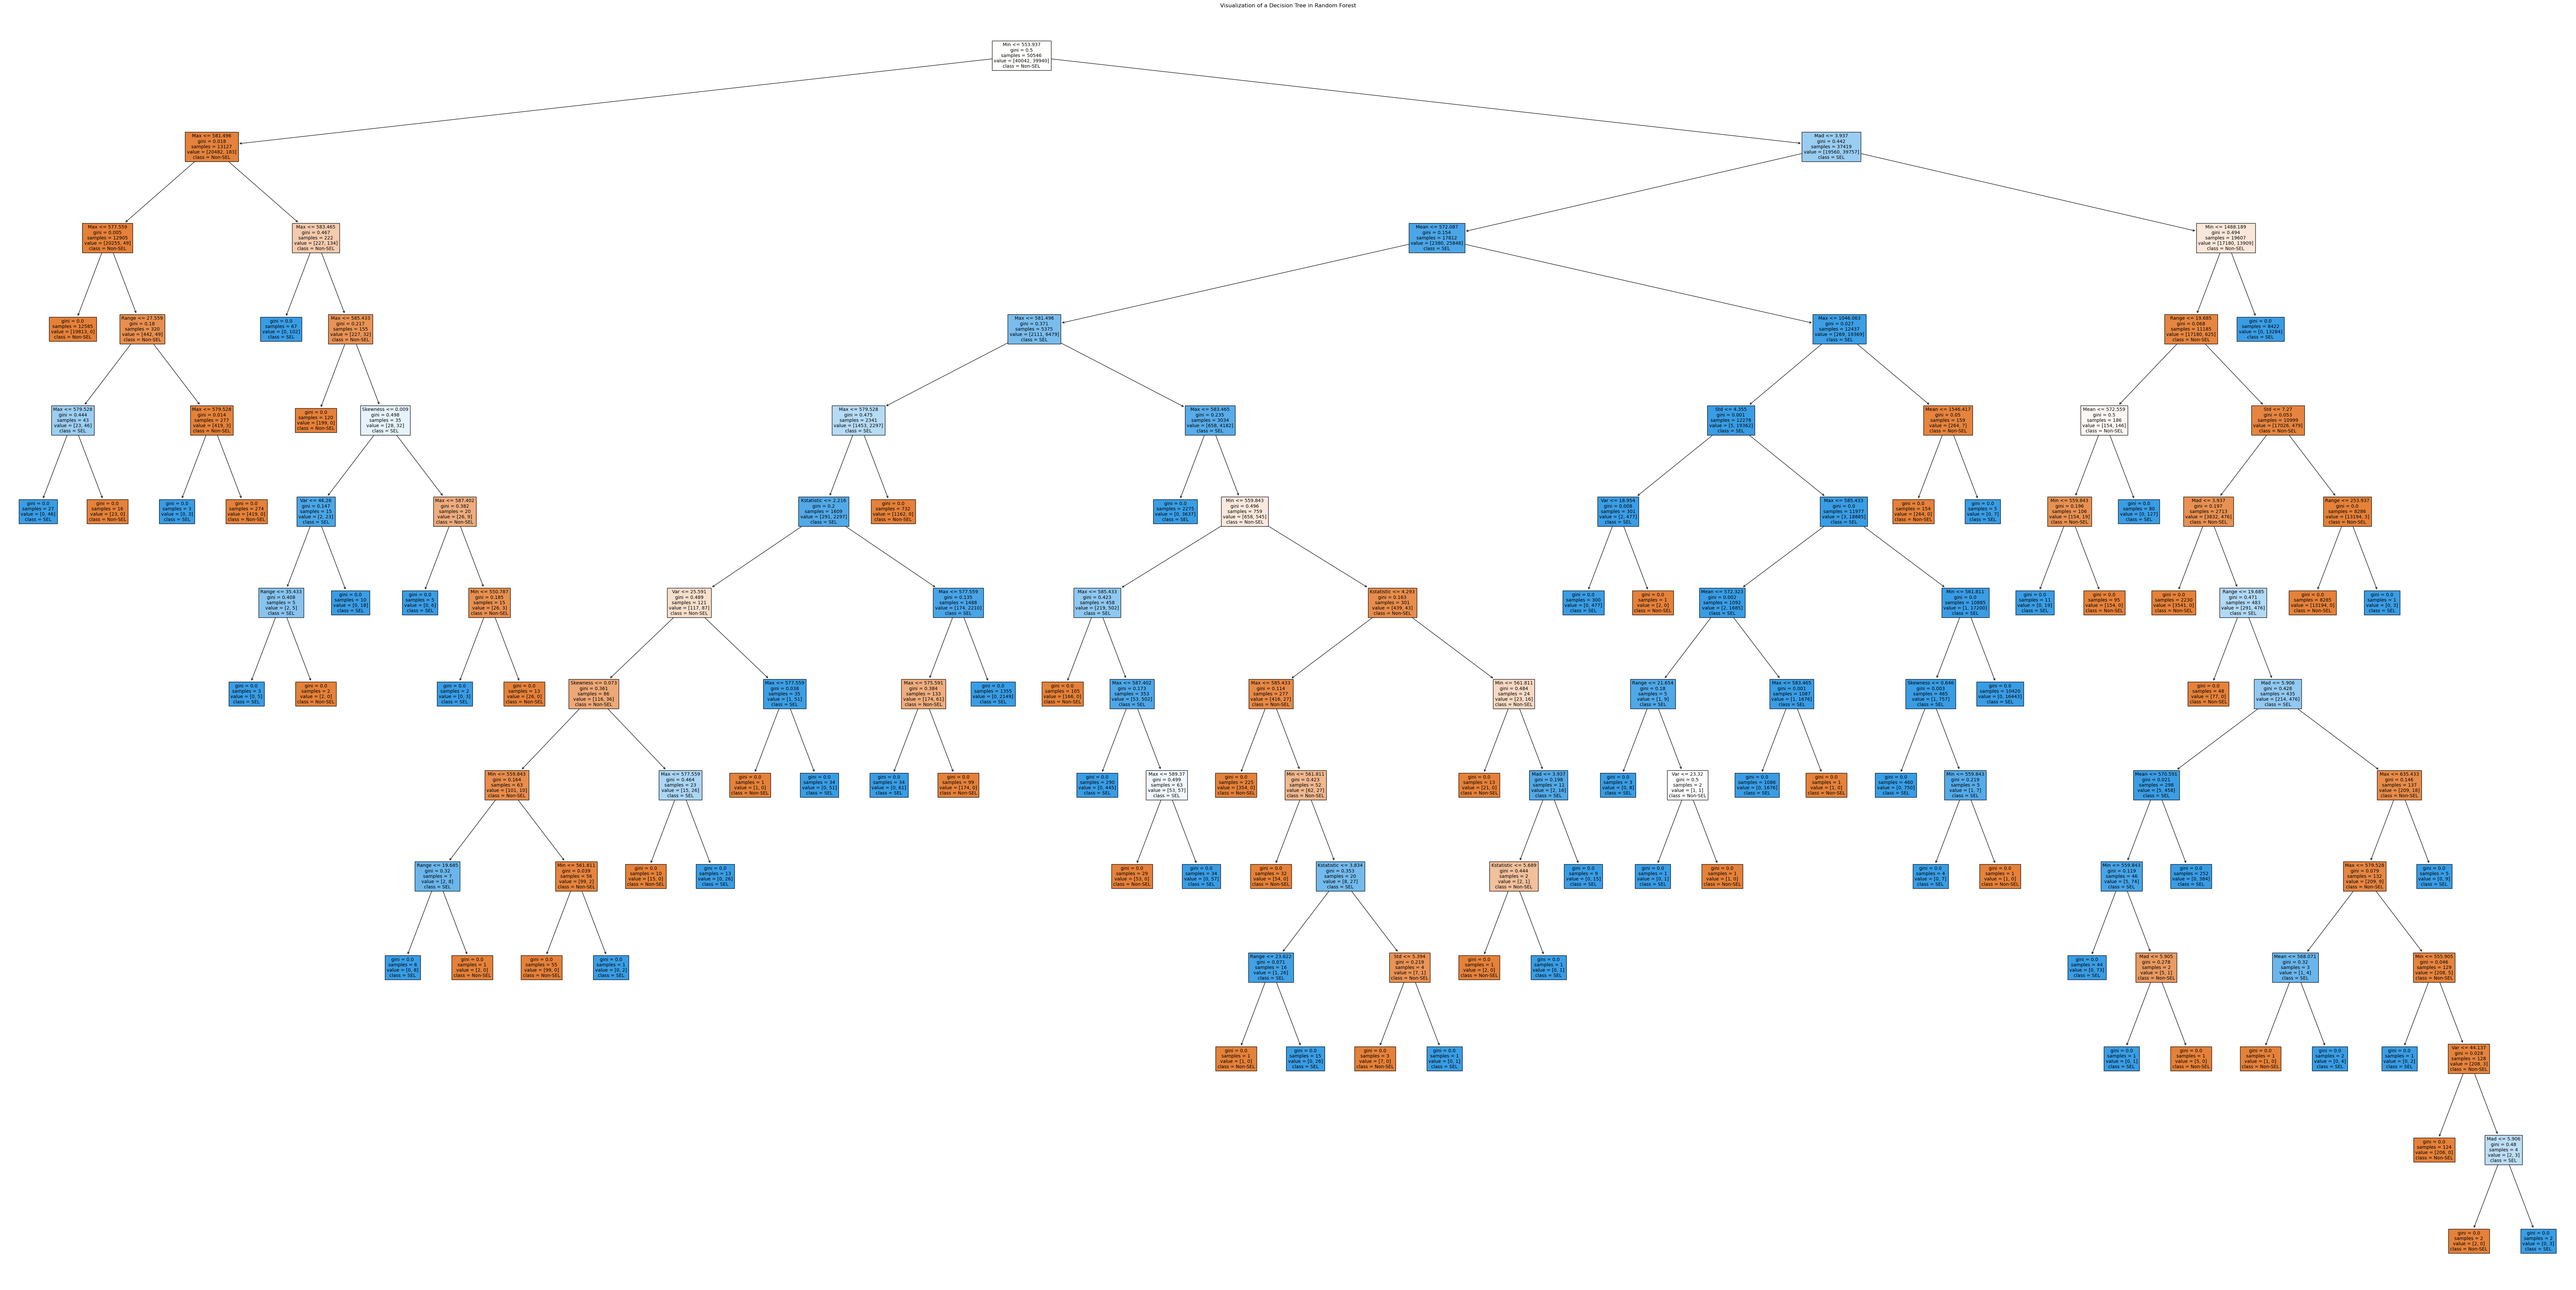

In [15]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Select one of the trees in your forest to visualize
tree_to_visualize = rf_classifier.estimators_[0]  # Visualizing the first tree as an example

plt.figure(figsize=(100,50))
plot_tree(tree_to_visualize, 
          filled=True, 
          class_names=['Non-SEL', 'SEL'], 
          feature_names=X.columns, 
        #   max_depth=10,  # Set the max_depth to avoid a too large visual
          fontsize=10)
plt.title('Visualization of a Decision Tree in Random Forest')
plt.show()

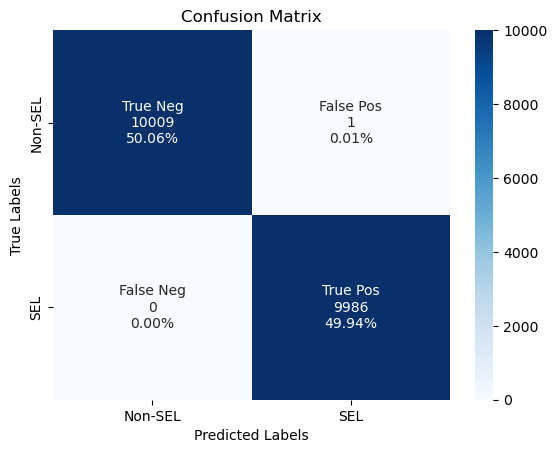

In [12]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)
cm_labels = ['True Neg','False Pos','False Neg','True Pos']
cm_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
cm_percentages = ["{0:.2%}".format(value) for value in cm.flatten()/np.sum(cm)]
cm_labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(cm_labels,cm_counts,cm_percentages)]

cm_labels = np.asarray(cm_labels).reshape(2,2)
sns.heatmap(cm, annot=cm_labels, fmt='', cmap='Blues', xticklabels=['Non-SEL', 'SEL'], yticklabels=['Non-SEL', 'SEL'])

plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()